# 

In [1]:
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from pix_framework.statistics import distribution

In [3]:
activity_a = lambda n : np.where(np.random.choice(a=[0, 1], size=n, p=[0.5, 0.5]),
         np.random.normal(50, 20, n),
         np.random.normal(200, 20, n)
        )

activity_b = lambda n : np.random.normal(50, 20, n)
activity_b = lambda n : np.where(np.random.choice(a=[0, 1], size=n, p=[0.5, 0.5]),
         np.random.normal(20, 20, n),
         np.random.normal(150, 20, n)
        )

In [4]:
activity_b(1)w

array([-3.55735895])

In [97]:
class WF_AND:
    def __init__(self, activities):
        self.activities = activities
    def duration(self):
        return np.max([a.duration() for a in self.activities])

class WF_OR:
    def __init__(self, activities, probabilities):
        self.activities = activities
        self.probabilities = probabilities
    def duration(self):
        return self.activities[np.random.choice(a=list(range(len(self.activities))), p=self.probabilities)].duration()

class WF_SEQ:
    def __init__(self, activities):
        self.activities = activities
    def duration(self):
        return np.sum([a.duration() for a in self.activities])

class Activity:
    def __init__(self, duration_density):
        self.duration_density = duration_density
    def duration(self):
        return self.duration_density.sample()

class DurationDensity:
    def __init__(self, duration_density):
        self.duration_density = duration_density

    def sample(self):
        return self.duration_density()
        
class ActivityA_DurationDensity(DurationDensity):
    def __init__(self):
        self.duration_density = lambda : np.where(np.random.choice(a=[0, 1], size=1, p=[0.5, 0.5]),
             np.random.normal(20, 20, 1),
             np.random.normal(150, 20, 1)
            )[0]

class ActivityB_DurationDensity(DurationDensity):
    def __init__(self):
        self.duration_density = lambda : np.where(np.random.choice(a=[0, 1], size=1, p=[0.5, 0.5]),
         np.random.normal(50, 20, 1),
         np.random.normal(200, 20, 1)
        )[0]

class ActivityA(Activity):
    def __init__(self):
        self.duration_density = ActivityA_DurationDensity()


class ActivityB(Activity):
    def __init__(self):
        self.duration_density = ActivityB_DurationDensity()
        
wf_and = lambda activities, n : np.max(np.concatenate([np.array(a(n), ndmin=2) for a in activities]), axis=0)
wf_or = lambda choices, activities, n : np.where(np.random.choice(a=list(range(len(activities))), p=choices), *[a for a in activities])
wf_seq = lambda activities, n : np.sum([a(n) for a in activities], axis=0)

In [114]:
process = WF_SEQ([ActivityA(), WF_AND([ActivityA(), ActivityB()]), WF_OR([ActivityA(), ActivityB()], [0.5, 0.5])])

In [115]:
process_durations = np.array([process.duration() for i in range(10000)])

(array([  2.,   5.,   1.,   3.,   5.,  12.,   7.,  11.,  20.,  20.,  34.,
         32.,  36.,  37.,  48.,  38.,  50.,  49.,  50.,  35.,  38.,  59.,
         37.,  55.,  56.,  67.,  85.,  79.,  87., 104., 149., 146., 174.,
        182., 191., 211., 174., 201., 180., 196., 184., 144., 158., 162.,
        149., 162., 173., 183., 204., 190., 215., 231., 239., 235., 254.,
        275., 241., 261., 245., 220., 221., 200., 179., 163., 143., 142.,
        116., 122., 109.,  78., 114.,  91.,  91., 107., 126., 103., 107.,
         90., 101.,  70.,  77.,  65.,  58.,  55.,  48.,  38.,  26.,  17.,
         17.,  15.,   5.,   6.,   3.,   2.,   2.,   0.,   1.,   0.,   0.,
          1.]),
 array([ -3.48018938,   3.37577966,  10.23174871,  17.08771776,
         23.94368681,  30.79965585,  37.6556249 ,  44.51159395,
         51.367563  ,  58.22353204,  65.07950109,  71.93547014,
         78.79143919,  85.64740823,  92.50337728,  99.35934633,
        106.21531538, 113.07128443, 119.92725347, 126.78322252

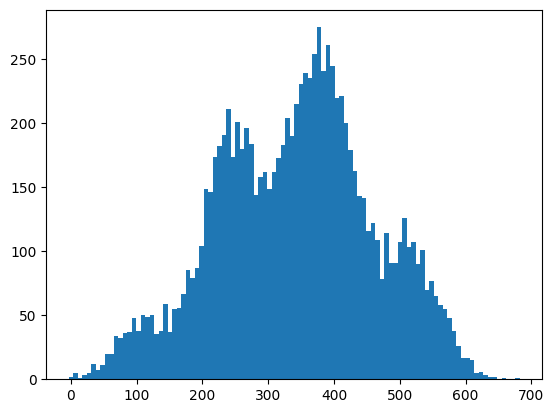

In [137]:
plt.hist(process_durations, bins=100 )

In [131]:
class FakeActivityA_DurationDensity(DurationDensity):
    def __init__(self, n=10000):
        real_a = ActivityA_DurationDensity()
        fitting = distribution.get_best_fitting_distribution([real_a.sample() for i in range(n)])
        self.duration_density = lambda : fitting.generate_sample(1)[0]

class FakeActivityB_DurationDensity(DurationDensity):
    def __init__(self, n=10000):
        real_b = ActivityB_DurationDensity()
        fitting = distribution.get_best_fitting_distribution([real_b.sample() for i in range(n)])
        self.duration_density = lambda : fitting.generate_sample(1)[0]

class FakeActivityA(Activity):
    def __init__(self):
        self.duration_density = FakeActivityA_DurationDensity()

class FakeActivityB(Activity):
    def __init__(self):
        self.duration_density = FakeActivityB_DurationDensity()

In [133]:
fake_process = WF_SEQ([FakeActivityA(), WF_AND([FakeActivityA(), FakeActivityB()]), WF_OR([FakeActivityA(), FakeActivityB()], [0.5, 0.5])])

In [134]:
fake_process_durations = np.array([fake_process.duration() for i in range(10000)])

(array([  2.,   6.,   7.,   9.,  13.,  12.,  20.,  16.,  13.,  23.,  25.,
         29.,  50.,  36.,  53.,  65.,  72.,  80.,  80.,  90.,  88., 101.,
        108., 127., 121., 140., 151., 155., 148., 156., 165., 150., 182.,
        209., 193., 251., 202., 233., 219., 216., 229., 226., 222., 188.,
        241., 202., 225., 224., 201., 221., 194., 208., 229., 188., 178.,
        202., 204., 166., 175., 158., 151., 164., 134., 117., 113.,  94.,
        117., 100.,  87.,  79.,  70.,  77.,  72.,  60.,  46.,  60.,  44.,
         46.,  37.,  33.,  29.,  24.,  24.,  15.,  15.,  19.,  12.,  10.,
         13.,   7.,   5.,   3.,   7.,   4.,   6.,   4.,   2.,   1.,   0.,
          2.]),
 array([ 32.00161941,  39.14284617,  46.28407294,  53.4252997 ,
         60.56652647,  67.70775324,  74.84898   ,  81.99020677,
         89.13143353,  96.2726603 , 103.41388706, 110.55511383,
        117.69634059, 124.83756736, 131.97879413, 139.12002089,
        146.26124766, 153.40247442, 160.54370119, 167.68492795

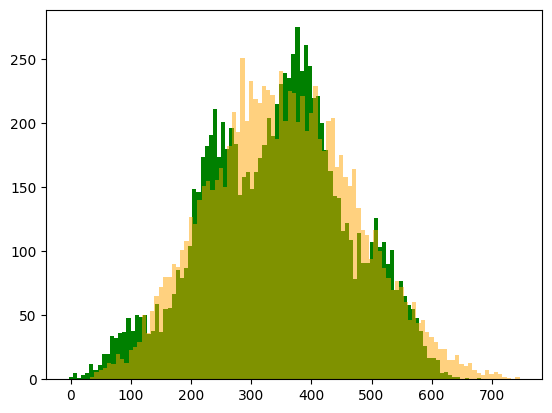

In [139]:
plt.hist(process_durations, bins=100, color='green')
plt.hist(fake_process_durations, bins=100, color='orange', alpha=0.5)

(array([14., 14.,  8., 11., 16., 13.,  8.,  7.,  9.,  4., 10.,  8.,  9.,
         8., 10., 10.,  9.,  9.,  9., 12., 11.,  7.,  8., 15., 20.,  9.,
        13., 14., 13., 11., 11.,  8., 10., 15., 13.,  8.,  8.,  8.,  9.,
         7., 10., 11., 10.,  7., 10.,  7.,  6., 12., 12.,  8.,  9.,  6.,
        13., 10., 11., 12.,  7.,  5.,  8., 15.,  7.,  9., 11.,  8.,  8.,
        16., 16., 11., 13., 12., 11., 10.,  9., 11., 12., 10., 11.,  8.,
        10., 12., 13.,  5.,  8.,  8.,  7.,  5., 12.,  8.,  7., 11., 10.,
        11., 12.,  8.,  9.,  9., 10., 14.,  3., 10.]),
 array([4.98314351e-02, 2.66040778e+00, 5.27098412e+00, 7.88156046e+00,
        1.04921368e+01, 1.31027131e+01, 1.57132895e+01, 1.83238658e+01,
        2.09344422e+01, 2.35450185e+01, 2.61555949e+01, 2.87661712e+01,
        3.13767475e+01, 3.39873239e+01, 3.65979002e+01, 3.92084766e+01,
        4.18190529e+01, 4.44296292e+01, 4.70402056e+01, 4.96507819e+01,
        5.22613583e+01, 5.48719346e+01, 5.74825110e+01, 6.00930873e+01,
  

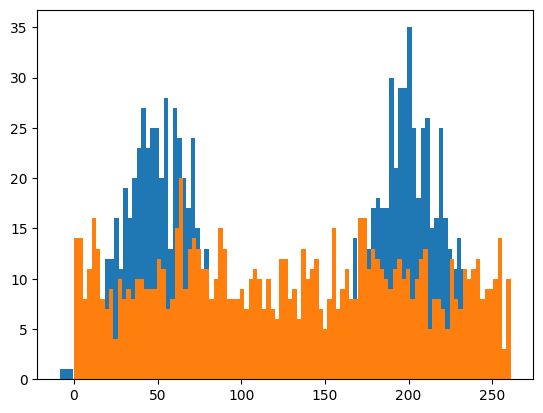

In [126]:
a = activity_a(1000)
d = distribution.get_best_fitting_distribution(a).generate_sample(1000)
plt.hist(a, bins=100 )
plt.hist(d, bins=100)

In [32]:
and_activities_trained = lambda n, m : np.max(np.concatenate((
        np.array(distribution.get_best_fitting_distribution(activity_a(m)).generate_sample(n), ndmin=2),
        np.array(distribution.get_best_fitting_distribution(activity_b(m)).generate_sample(n), ndmin=2)
    )), axis=0)

In [33]:
real_distribution = and_activities(1000)
trained_distribution = and_activities_trained(1000, 1000)


(array([ 1.,  2.,  2.,  2.,  1.,  4.,  1.,  1.,  3.,  1.,  3., 10.,  2.,
         4.,  2.,  1.,  1.,  4.,  5.,  0.,  3.,  1.,  3.,  0.,  1.,  0.,
         1.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,
         3.,  2.,  5.,  0.,  1.,  1.,  2.,  1.,  6.,  3.,  3.,  1.,  5.,
         2.,  2.,  5.,  3.,  5.,  4.,  3.,  8.,  8., 15., 15., 20., 14.,
        19., 14., 18., 24., 22., 27., 48., 27., 35., 32., 40., 35., 36.,
        48., 45., 50., 36., 49., 30., 23., 17., 21., 17., 15., 14., 13.,
        10.,  7., 10.,  4.,  4.,  4.,  1.,  0.,  4.]),
 array([ 40.61735217,  42.77118911,  44.92502605,  47.07886299,
         49.23269993,  51.38653687,  53.54037381,  55.69421075,
         57.84804769,  60.00188463,  62.15572157,  64.30955851,
         66.46339545,  68.61723239,  70.77106933,  72.92490627,
         75.07874321,  77.23258015,  79.38641709,  81.54025403,
         83.69409097,  85.84792791,  88.00176485,  90.15560179,
         92.30943872,  94.46327566,  96.6171126 , 

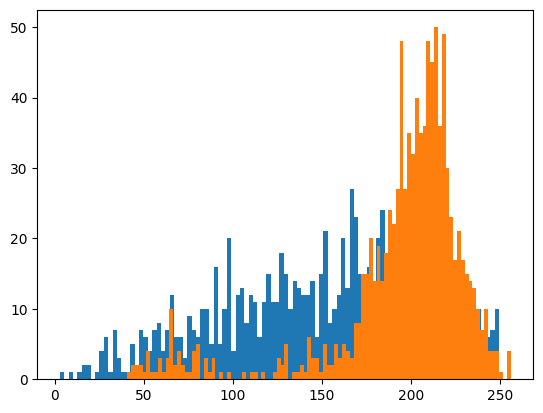

In [35]:
plt.hist(trained_distribution, bins=100)
plt.hist(real_distribution, bins=100 )
